# Loan Analysis



The given consumer finance company is specializes in lending various types of loans to urban customers. The company receives a loan application and to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
 1. If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
 2. If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to 
    a financial loss for the company.


## Data set

The data set given contains the information about the past loan applicants and whether they ‘defaulted’ or not, with the data available we need to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

## Business Objective

Lending Club wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read the dataset
Lccs1=pd.read_csv("loan.csv", low_memory=False)
Lccs1.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [3]:
#Check the shape of the dataframe
Lccs1.shape

(39717, 111)

# Data Handling and Cleaning

 - For Missing Values: Some common techniques to treat this issue are
    - Dropping the rows containing the missing values
    - Imputing the missing values
    - Keep the missing values if they don't affect the analysis
     
 - Incorrect Data Types:
    - Clean certain values 
    - Clean and convert an entire column

## Remove all the columns will Null percentage greater than 80

Including this column in dataset will result in improper analysis, so removing all those columns.

In [4]:
# percentage of null values in each column
Lccs1.isnull().mean().round(4)*100

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

In [5]:
# Removing thecolumn with more than 80% null values
column_with_Null_values = Lccs1.columns[Lccs1.isnull().any()]
for column in column_with_Null_values:
    if Lccs1[column].isnull().sum()*100.0/len(Lccs1) > 80:
        Lccs1.drop(column,1, inplace=True)

In [6]:
Lccs1.isnull().sum()*100.0/len(Lccs1)> 80

id                            False
member_id                     False
loan_amnt                     False
funded_amnt                   False
funded_amnt_inv               False
term                          False
int_rate                      False
installment                   False
grade                         False
sub_grade                     False
emp_title                     False
emp_length                    False
home_ownership                False
annual_inc                    False
verification_status           False
issue_d                       False
loan_status                   False
pymnt_plan                    False
url                           False
desc                          False
purpose                       False
title                         False
zip_code                      False
addr_state                    False
dti                           False
delinq_2yrs                   False
earliest_cr_line              False
inq_last_6mths              

In [7]:
Lccs1.shape

(39717, 55)

In [8]:
Lccs1.isnull().mean().round(4)*100

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

### Droping the desc,mths_since_last_delinq Columns
These 2 columns has more missing values compared to other columns the 'desc' column has improper set of values and the 'mths_since_last_delinq' has more than 60% of missing values. 

In [9]:
Lccs1['desc'].value_counts()

In [10]:
Lccs1.drop(['desc', 'mths_since_last_delinq'], axis=1, inplace=True)

## Removing all the uniue value columns

In [11]:
Lccs1.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

 These column has 1 unique value which is not used for any analysis

In [12]:
Lccs1['chargeoff_within_12_mths'].value_counts()

0.0    39661
Name: chargeoff_within_12_mths, dtype: int64

In [13]:
Lccs1['initial_list_status'].value_counts()

f    39717
Name: initial_list_status, dtype: int64

In [14]:
Lccs1.drop(['pymnt_plan','initial_list_status','policy_code','application_type','acc_now_delinq','chargeoff_within_12_mths'
            ,'collections_12_mths_ex_med','delinq_amnt','tax_liens'] , axis=1, inplace=True)

## Dropping the emp_title ,title column                     

- The emp_title column consists of the different job role of the employee, we can use the experience(emp_length) column instead of 
- The Title column consists of the purpose of the loan with explanation, it has so many distinct values, cannot be used for analysis

In [15]:
Lccs1.drop(['emp_title','title'], axis=1, inplace=True)

In [16]:
Lccs1.isnull().mean().round(4)*100

id                         0.00
member_id                  0.00
loan_amnt                  0.00
funded_amnt                0.00
funded_amnt_inv            0.00
term                       0.00
int_rate                   0.00
installment                0.00
grade                      0.00
sub_grade                  0.00
emp_length                 2.71
home_ownership             0.00
annual_inc                 0.00
verification_status        0.00
issue_d                    0.00
loan_status                0.00
url                        0.00
purpose                    0.00
zip_code                   0.00
addr_state                 0.00
dti                        0.00
delinq_2yrs                0.00
earliest_cr_line           0.00
inq_last_6mths             0.00
open_acc                   0.00
pub_rec                    0.00
revol_bal                  0.00
revol_util                 0.13
total_acc                  0.00
out_prncp                  0.00
out_prncp_inv              0.00
total_py

## Removing all the Customer behaviour variables
Since our analysis will be at issue of loan , we need to remove the Customer behavioural columns, only the old customer with transaction records have these data, if we included those columns then this may affect the new applicant for loan.

In [17]:
### Identifying the behavioural columns and remove from df

behavioural_columns = [ 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec','revol_bal', 'revol_util',
                    'total_acc', 'out_prncp', 'out_prncp_inv','total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 
                     'total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 
                     'last_credit_pull_d']

Lccs1.drop(behavioural_columns, axis=1, inplace=True)

In [18]:
Lccs1.isnull().mean().round(4)*100

id                      0.00
member_id               0.00
loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_length              2.71
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
url                     0.00
purpose                 0.00
zip_code                0.00
addr_state              0.00
dti                     0.00
pub_rec_bankruptcies    1.75
dtype: float64

## Removing all the unused columns

In [19]:
unused_columns = ['id','member_id','funded_amnt_inv', 'zip_code', 'url','installment','funded_amnt']
Lccs1.drop(unused_columns, axis=1, inplace=True)

In [20]:
Lccs1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             39717 non-null  int64  
 1   term                  39717 non-null  object 
 2   int_rate              39717 non-null  object 
 3   grade                 39717 non-null  object 
 4   sub_grade             39717 non-null  object 
 5   emp_length            38642 non-null  object 
 6   home_ownership        39717 non-null  object 
 7   annual_inc            39717 non-null  float64
 8   verification_status   39717 non-null  object 
 9   issue_d               39717 non-null  object 
 10  loan_status           39717 non-null  object 
 11  purpose               39717 non-null  object 
 12  addr_state            39717 non-null  object 
 13  dti                   39717 non-null  float64
 14  pub_rec_bankruptcies  39020 non-null  float64
dtypes: float64(3), int6

### Removing the current loan
#### For the EDA we need to consider only the Fully paid loan and the loan which is charged off

In [21]:
Lccs1['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [22]:
Lccs1 = Lccs1[~Lccs1['loan_status'].isin(["Current"])]

In [23]:
Lccs1['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [24]:
Lccs1.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,36 months,10.65%,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,60 months,15.27%,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,36 months,15.96%,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,36 months,13.49%,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,36 months,7.90%,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


### Adding the missing value with mode value

Removal of more number of records(rows) from data set will lead to the data loss

In [25]:
Lccs1['emp_length'].value_counts()

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [26]:
Lccs1['emp_length'].isnull().sum()

1033

In [27]:
Lccs1['emp_length'] = Lccs1['emp_length'].fillna(Lccs1['emp_length'].mode()[0])

In [28]:
Lccs1['emp_length'].isnull().sum()

0

In [29]:
Lccs1['emp_length'].value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

Here there are about 1033 records with null values assigning the mode value to the missing data

### Assigning the median values to the column for null values in pub_rec_bankruptcies column

In [30]:
Lccs1['pub_rec_bankruptcies'].value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [31]:
Lccs1['pub_rec_bankruptcies'].isnull().sum()

697

In [32]:
Lccs1['pub_rec_bankruptcies'].describe()

count    37880.000000
mean         0.043479
std          0.204583
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          2.000000
Name: pub_rec_bankruptcies, dtype: float64

In [33]:
Lccs1["pub_rec_bankruptcies"].fillna(0.0, inplace = True)

In [34]:
Lccs1['pub_rec_bankruptcies'].value_counts()

0.0    36935
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

## Changing the columns datatype to required format for exploration

#### Removing % from Interests column

In [35]:
Lccs1['int_rate'] = Lccs1.int_rate.str.replace('%' , '')
Lccs1['int_rate']=pd.to_numeric(Lccs1.int_rate)

In [36]:
Lccs1.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies
0,5000,36 months,10.65,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,AZ,27.65,0.0
1,2500,60 months,15.27,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,GA,1.00,0.0
2,2400,36 months,15.96,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,IL,8.72,0.0
3,10000,36 months,13.49,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,CA,20.00,0.0
5,5000,36 months,7.90,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,AZ,11.20,0.0


In [37]:
Lccs1.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

### Rounding off the Annual_inc column

In [38]:
Lccs1['annual_inc']=Lccs1['annual_inc'].round(0).astype('int64')

In [39]:
Lccs1.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

#### Removing the 'months' string from the term column

In [40]:
Lccs1['term']=Lccs1.term.str.replace('months' , '')
Lccs1['term']=pd.to_numeric(Lccs1.term)

In [41]:
Lccs1.term.value_counts()

36    29096
60     9481
Name: term, dtype: int64

#### Creating 2 separate column month and year from the issue_d column

In [42]:
 Lccs1['issue_d']=pd.to_datetime(Lccs1['issue_d'], format='%b-%y')

In [43]:
# splitting of month and year on issue date
Lccs1['issue_d_month'] = Lccs1['issue_d'].dt.month
Lccs1['issue_d_year'] = Lccs1['issue_d'].dt.year

In [44]:
Lccs1.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_d_month,issue_d_year
0,5000,36,10.65,B,B2,10+ years,RENT,24000,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,12,2011
1,2500,60,15.27,C,C4,< 1 year,RENT,30000,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,12,2011
2,2400,36,15.96,C,C5,10+ years,RENT,12252,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,12,2011
3,10000,36,13.49,C,C1,10+ years,RENT,49200,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,12,2011
5,5000,36,7.90,A,A4,3 years,RENT,36000,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0.0,12,2011


## Adding the Loan status category column

By giving the binary values , the column will be used for detailed analysis
0 - Fully paid , 1- Charged off

In [45]:
Lccs1['loan_status_category']=Lccs1['loan_status'].apply(lambda x: 1 if x=='Charged Off' else 0)

In [46]:
Lccs1.head()

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_d_month,issue_d_year,loan_status_category
0,5000,36,10.65,B,B2,10+ years,RENT,24000,Verified,2011-12-01,Fully Paid,credit_card,AZ,27.65,0.0,12,2011,0
1,2500,60,15.27,C,C4,< 1 year,RENT,30000,Source Verified,2011-12-01,Charged Off,car,GA,1.00,0.0,12,2011,1
2,2400,36,15.96,C,C5,10+ years,RENT,12252,Not Verified,2011-12-01,Fully Paid,small_business,IL,8.72,0.0,12,2011,0
3,10000,36,13.49,C,C1,10+ years,RENT,49200,Source Verified,2011-12-01,Fully Paid,other,CA,20.00,0.0,12,2011,0
5,5000,36,7.90,A,A4,3 years,RENT,36000,Source Verified,2011-12-01,Fully Paid,wedding,AZ,11.20,0.0,12,2011,0


In [47]:
Lccs1['loan_status'].value_counts()

Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

In [48]:
Lccs1['loan_status_category'].value_counts()

0    32950
1     5627
Name: loan_status_category, dtype: int64

### Changing the emp_length format as input given in data dictionary

Assigning the values accordingly to more readable format and for analysis purpose

In [49]:
Lccs1['emp_length'].value_counts()

10+ years    9521
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
Name: emp_length, dtype: int64

In [50]:
replace = {
    '10+ years': 10,
    '2 years': 2,
    '< 1 year': 0,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '1 year': 1,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9
}
Lccs1= Lccs1.replace({"emp_length": replace })


In [51]:
Lccs1['emp_length'].value_counts()

10    9521
0     4508
2     4291
3     4012
4     3342
5     3194
1     3169
6     2168
7     1711
8     1435
9     1226
Name: emp_length, dtype: int64

In [52]:
Lccs1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38577 non-null  int64         
 1   term                  38577 non-null  int64         
 2   int_rate              38577 non-null  float64       
 3   grade                 38577 non-null  object        
 4   sub_grade             38577 non-null  object        
 5   emp_length            38577 non-null  int64         
 6   home_ownership        38577 non-null  object        
 7   annual_inc            38577 non-null  int64         
 8   verification_status   38577 non-null  object        
 9   issue_d               38577 non-null  datetime64[ns]
 10  loan_status           38577 non-null  object        
 11  purpose               38577 non-null  object        
 12  addr_state            38577 non-null  object        
 13  dti             

## Univariate Analysis

### Interest Rate

In [53]:
Lccs1.int_rate.describe()

count    38577.000000
mean        11.932219
std          3.691327
min          5.420000
25%          8.940000
50%         11.710000
75%         14.380000
max         24.400000
Name: int_rate, dtype: float64

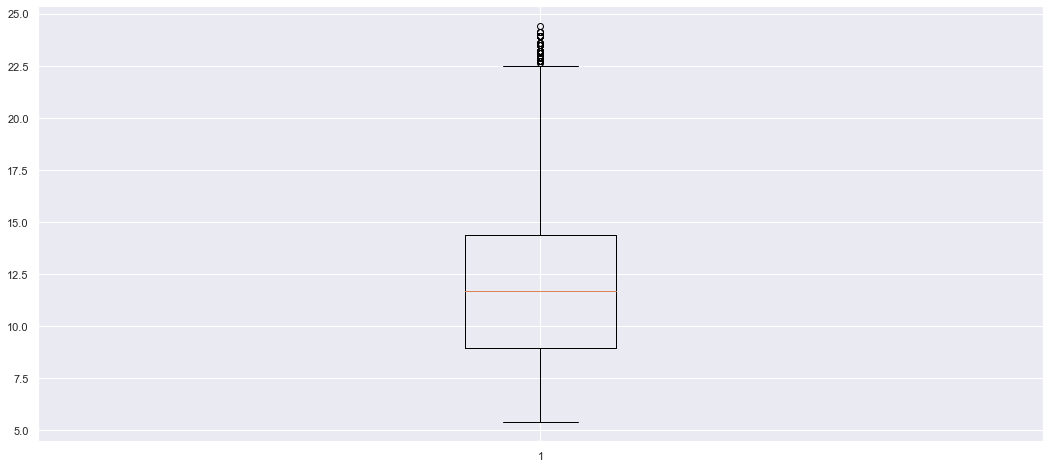

In [54]:
sns.set(rc={'figure.figsize':(18,8)})
plt.boxplot(Lccs1.int_rate)
plt.show()

The Median interest rate is around 12.5% and the max interest rate is around 24%. There were some of the outliers as well

### Annual Income

In [55]:
Lccs1.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

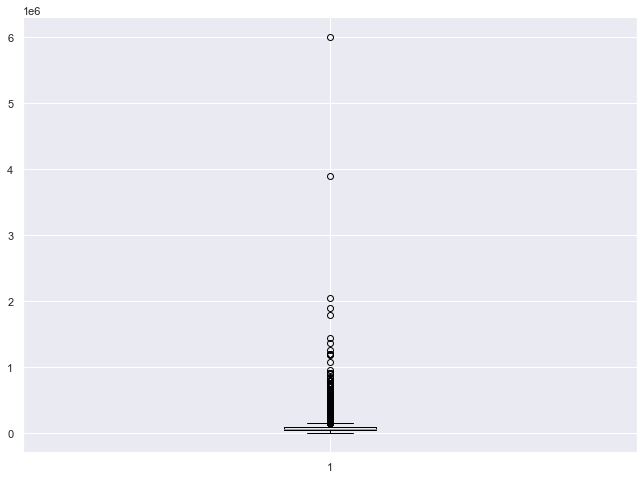

In [56]:
sns.set(rc={'figure.figsize':(11,8)})

plt.boxplot(Lccs1.annual_inc)
plt.show()

## Outlier Removal

From the graph we can find some outliers over there since the values are less in number we can remove those 

In [57]:
Lccs1[Lccs1.annual_inc>1000000]

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_d_month,issue_d_year,loan_status_category
7247,12025,36,14.27,C,C2,10,RENT,1782000,Not Verified,2011-09-01,Fully Paid,debt_consolidation,NY,1.31,0.0,9,2011,0
10621,15775,60,12.99,C,C1,2,MORTGAGE,1250000,Verified,2011-07-01,Charged Off,debt_consolidation,MI,21.81,0.0,7,2011,1
21412,10000,36,6.54,A,A4,10,OWN,1200000,Verified,2011-01-01,Fully Paid,debt_consolidation,CT,1.46,0.0,1,2011,0
23551,1500,36,6.17,A,A3,5,MORTGAGE,1900000,Source Verified,2010-11-01,Fully Paid,credit_card,TX,0.57,0.0,11,2010,0
24166,25000,60,15.20,D,D4,10,RENT,1200000,Source Verified,2010-11-01,Fully Paid,debt_consolidation,LA,0.41,0.0,11,2010,0
25762,12000,36,7.51,A,A4,1,MORTGAGE,1200000,Not Verified,2010-09-01,Fully Paid,debt_consolidation,NJ,9.17,0.0,9,2010,0
27564,5600,60,13.61,C,C2,10,MORTGAGE,1176000,Source Verified,2010-07-01,Fully Paid,other,MD,1.22,0.0,7,2010,0
28906,4500,60,7.88,A,A5,8,MORTGAGE,1080000,Source Verified,2010-06-01,Fully Paid,major_purchase,MD,0.57,0.0,6,2010,0
29639,25000,60,10.62,B,B3,3,MORTGAGE,3900000,Not Verified,2010-06-01,Fully Paid,home_improvement,NM,0.20,0.0,6,2010,0
30107,5000,36,12.73,C,C1,10,MORTGAGE,6000000,Source Verified,2010-05-01,Fully Paid,home_improvement,CA,0.01,0.0,5,2010,0


In [58]:
Lccs1 = Lccs1[~(Lccs1['annual_inc']>1000000)]

In [59]:
Lccs1.shape

(38563, 18)

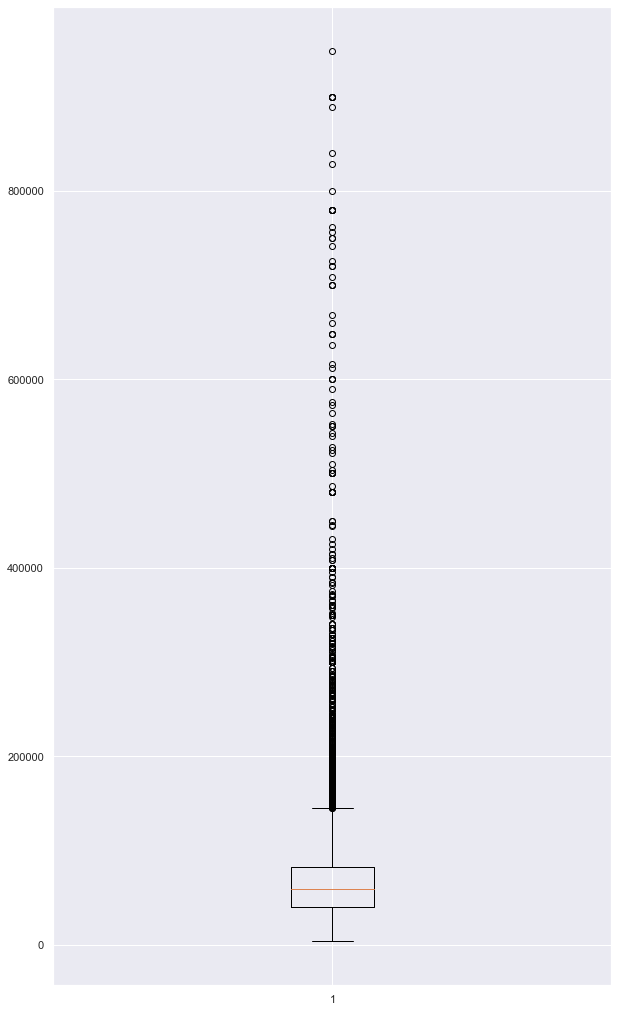

In [60]:
sns.set(rc={'figure.figsize':(10,18)})

plt.boxplot(Lccs1.annual_inc)
plt.show()

Since we have more outlier for the annual_inc we assigned the Upper_bound value to the outlier

In [61]:
Q1=Lccs1['annual_inc'].quantile(0.25)
Q3=Lccs1['annual_inc'].quantile(0.75)
IQR=Q3-Q1
upper_bound=Q3 + 1.5 * IQR
print(upper_bound)

145000.0


In [62]:
Lccs1[(Lccs1.annual_inc>upper_bound)]

,loan_amnt,term,int_rate,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,addr_state,dti,pub_rec_bankruptcies,issue_d_month,issue_d_year,loan_status_category
74,14400,36,8.90,A,A5,0,OWN,150000,Source Verified,2011-12-01,Fully Paid,debt_consolidation,NY,14.85,0.0,12,2011,0
80,35000,60,17.27,D,D3,3,MORTGAGE,150000,Verified,2011-12-01,Fully Paid,home_improvement,NY,7.51,0.0,12,2011,0
170,25000,36,12.42,B,B4,2,RENT,225000,Verified,2011-12-01,Fully Paid,debt_consolidation,NJ,8.32,0.0,12,2011,0
185,35000,36,10.65,B,B2,2,MORTGAGE,168000,Verified,2011-12-01,Fully Paid,debt_consolidation,TX,3.17,0.0,12,2011,0
298,8000,36,11.71,B,B3,1,RENT,150000,Not Verified,2011-12-01,Fully Paid,credit_card,NY,2.48,0.0,12,2011,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39694,5000,36,7.43,A,A2,8,MORTGAGE,150000,Not Verified,2007-07-01,Fully Paid,home_improvement,GA,0.00,0.0,7,2007,0
39703,3000,36,10.28,C,C1,2,MORTGAGE,200000,Not Verified,2007-07-01,Fully Paid,home_improvement,NY,0.00,0.0,7,2007,0
39706,5000,36,8.07,A,A4,0,MORTGAGE,180000,Not Verified,2007-07-01,Fully Paid,home_improvement,WI,5.55,0.0,7,2007,0
39707,5000,36,9.33,B,B3,2,MORTGAGE,180000,Not Verified,2007-07-01,Fully Paid,home_improvement,WI,11.93,0.0,7,2007,0


In [63]:
Lccs1['annual_inc']=Lccs1['annual_inc'].apply(lambda x: x if x <= 145000 else 145000)


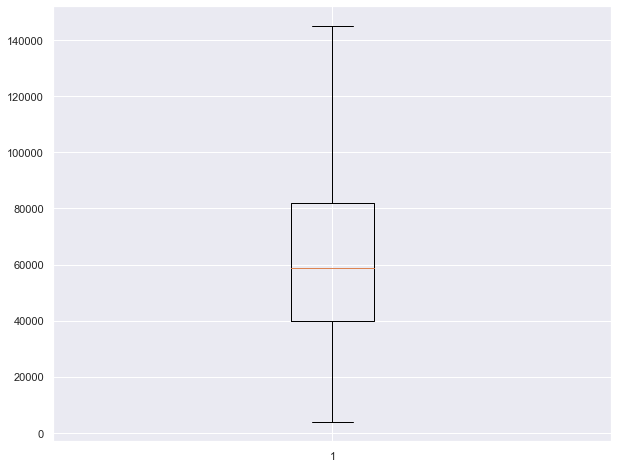

In [64]:
sns.set(rc={'figure.figsize':(10,8)})

plt.boxplot(Lccs1.annual_inc)
plt.show()

### Loan amount Box plot

In [65]:
Lccs1.loan_amnt.describe()

count    38563.000000
mean     11047.201981
std       7348.603711
min        500.000000
25%       5300.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

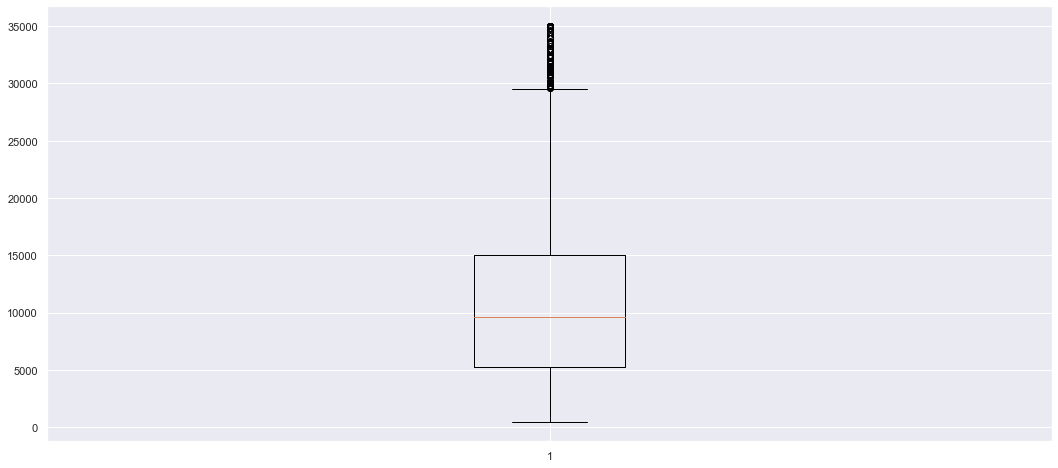

In [66]:
sns.set(rc={'figure.figsize':(18,8)})

plt.boxplot(Lccs1.loan_amnt)
plt.show()

### Laon status

In [67]:
Lccs1.loan_status_category.describe()

count    38563.000000
mean         0.145891
std          0.353002
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status_category, dtype: float64

The 14% Loan are charged off

The Bar plot of the Loan status

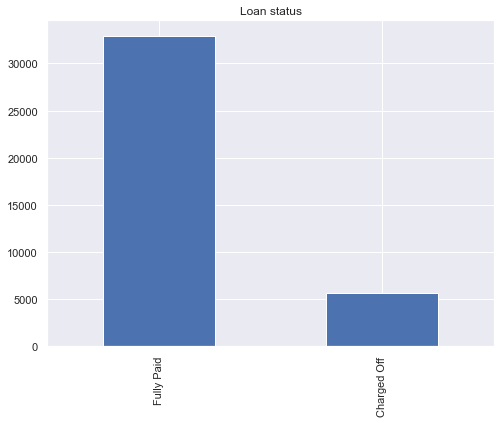

In [68]:
#Plot a bar chart
sns.set(rc={'figure.figsize':(8,6)})
Lccs1['loan_status'].value_counts().plot.bar(title='Loan status')
plt.show()

This is evident from the plot the almost 86% of the loans are fully paid back.

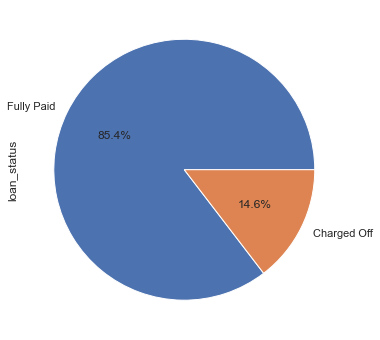

In [69]:
#Plot a pie chart
Lccs1['loan_status'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

### Emp_length

In [70]:
Lccs1.emp_length.value_counts()

10    9516
0     4507
2     4290
3     4011
4     3342
5     3193
1     3167
6     2168
7     1710
8     1434
9     1225
Name: emp_length, dtype: int64

From the bar graph, it is identified that the person with more than 10+ experience has breought more loans and followed by the least experience from there the curve starts decling till the one with 9 years of exoerience. 

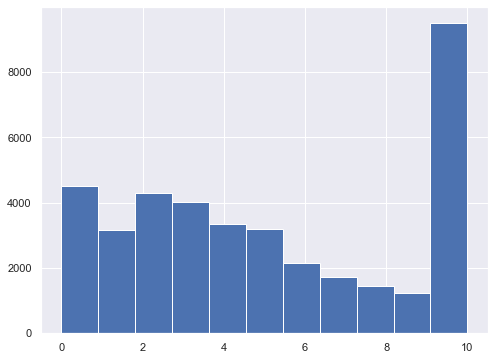

In [71]:
sns.set(rc={'figure.figsize':(8,6)})
plt.hist(Lccs1.emp_length,bins=11)
plt.show()

## Month 

In [72]:
Lccs1['issue_d_month'].value_counts()

12    4214
11    4002
10    3761
9     3496
8     3388
7     3349
6     3178
5     2918
4     2831
3     2690
1     2378
2     2358
Name: issue_d_month, dtype: int64

it is clear from the plot the loans are issues mostly on the Nov,Dec.May be the loan are issued to achieve the year end target.

<AxesSubplot:xlabel='issue_d_month', ylabel='count'>

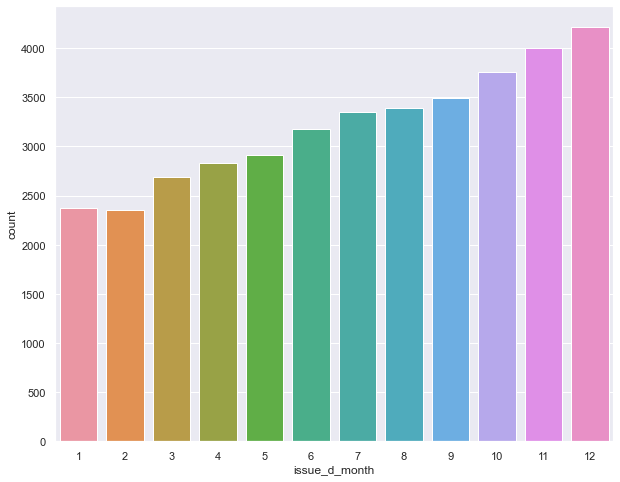

In [73]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(x='issue_d_month', data=Lccs1)

### Year

In [74]:
Lccs1['issue_d_year'].value_counts()

2011    20513
2010    11525
2009     4713
2008     1561
2007      251
Name: issue_d_year, dtype: int64

From the graph, it is identified there is increase in issuing loans over the year

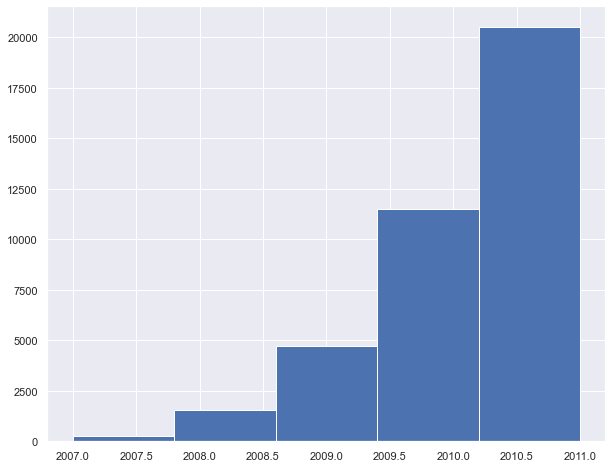

In [75]:
plt.hist(Lccs1.issue_d_year,bins=5)
plt.show()

### Home ownership

In [76]:
Lccs1['home_ownership'].value_counts()

RENT        18477
MORTGAGE    17011
OWN          2974
OTHER          98
NONE            3
Name: home_ownership, dtype: int64

The more loans are issued for the person who lives in Rent or mortage

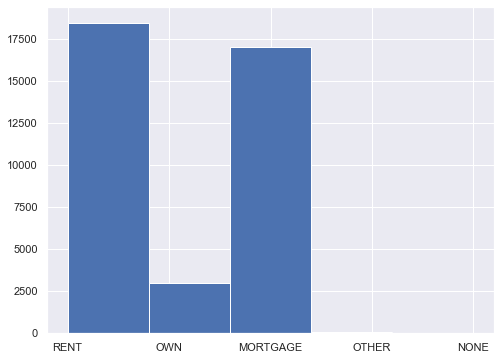

In [77]:
sns.set(rc={'figure.figsize':(8,6)})
plt.hist(Lccs1.home_ownership,bins=5)
plt.show()

### Purpose

In [78]:
Lccs1['purpose'].value_counts()

debt_consolidation    18048
credit_card            5026
other                  3863
home_improvement       2873
major_purchase         2148
small_business         1754
car                    1499
wedding                 926
medical                 681
moving                  576
vacation                375
house                   367
educational             325
renewable_energy        102
Name: purpose, dtype: int64

Most of the persons falls under debt consolidation clearly shows the single person brought more loans.

<AxesSubplot:xlabel='count', ylabel='purpose'>

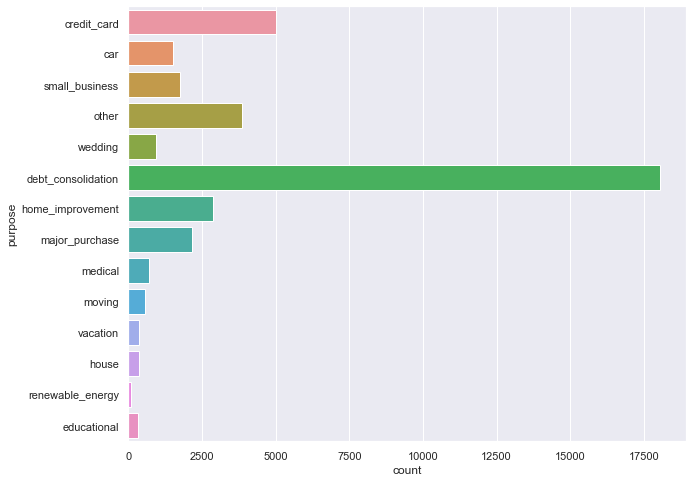

In [79]:
sns.set(rc={'figure.figsize':(10,8)})
sns.countplot(y='purpose', data=Lccs1)

## Grade

In [80]:
Lccs1['grade'].value_counts()

B    11674
A    10038
C     7829
D     5084
E     2663
F      976
G      299
Name: grade, dtype: int64

Most of the loans are assigne under A,B by Lending club clearly shows the loans are issued in large number for low risk applicants

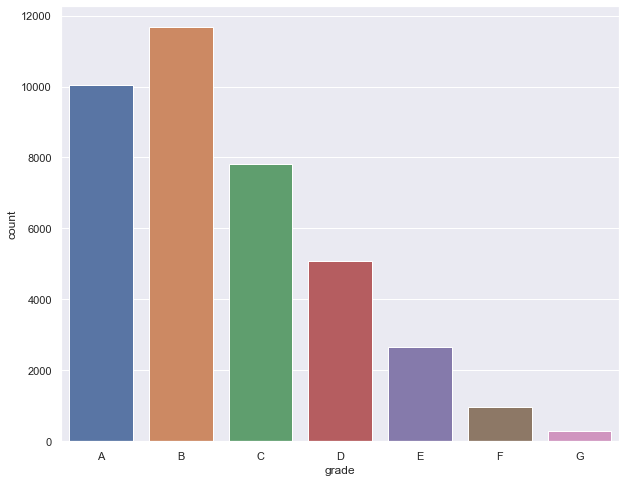

In [81]:
level_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sns.countplot(data = Lccs1, x = 'grade', order=level_order);

## Interest Rate Vs Loan Status

The Interest rates are divided into 5 parts based on min, 25%, Median, 50%  and max values for easy analysis
Adding extra 1 bin for the graph purposes.

In [82]:
Lccs1['int_rate'].describe()

count    38563.000000
mean        11.932850
std          3.691377
min          5.420000
25%          8.940000
50%         11.710000
75%         14.420000
max         24.400000
Name: int_rate, dtype: float64

In [83]:
Lccs1['int_rate_bin'] = pd.cut(Lccs1['int_rate'], 
                                [0,5,10,15,20,25,30], 
                                labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
Lccs1['int_rate_bin'].value_counts()

10-15    18259
5-10     12309
15-20     7225
20-25      770
0-5          0
25-30        0
Name: int_rate_bin, dtype: int64

In [84]:
pd.crosstab(Lccs1.int_rate_bin, Lccs1.loan_status_category, margins=True, margins_name="Total", normalize="index")

loan_status_category,0,1
int_rate_bin,,
5-10,0.932570,0.067430
10-15,0.851799,0.148201
15-20,0.751696,0.248304
20-25,0.615584,0.384416
Total,0.854109,0.145891


High interest rates defaults more

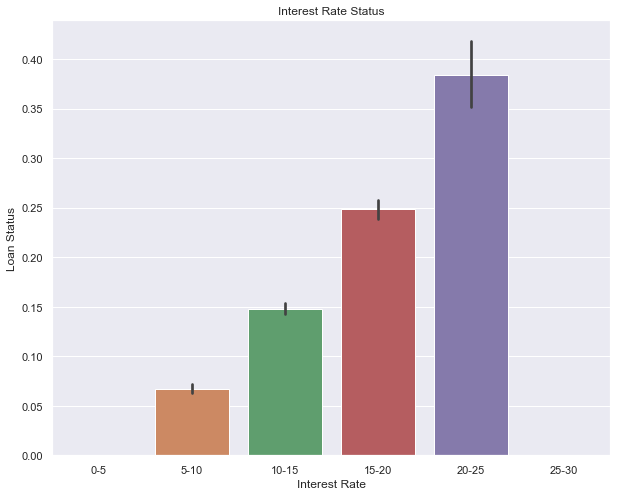

In [85]:
sns.barplot(x='int_rate_bin', y='loan_status_category', data=Lccs1)
plt.title('Interest Rate Status')
plt.xlabel('Interest Rate')
plt.ylabel('Loan Status')
plt.show()

## Annual Income Vs Loan Status

The Annaul Income are divided into 4 parts based on min, 25%, Median, 50%  and max values as low, medium,high, very high for easy analysis


In [86]:
Lccs1.annual_inc.describe()

count     38563.000000
mean      65015.890595
std       32623.299175
min        4000.000000
25%       40000.000000
50%       58800.000000
75%       82000.000000
max      145000.000000
Name: annual_inc, dtype: float64

In [87]:
Lccs1['annual_inc_cat'] = Lccs1['annual_inc']
Lccs1['annual_inc_cat'].describe().astype('int')

count     38563
mean      65015
std       32623
min        4000
25%       40000
50%       58800
75%       82000
max      145000
Name: annual_inc_cat, dtype: int32

In [88]:
def annual_inc_cat(inc):
    if inc <= 40000:
        return 'low'
    elif inc > 40000 and inc <=60000:
        return 'medium'
    elif inc > 60000 and inc <=100000:
        return 'high'
    else:
        return 'very high'

Lccs1['annual_inc_cat'] = Lccs1['annual_inc_cat'].apply(lambda x: annual_inc_cat(x))
Lccs1['annual_inc_cat'].value_counts()

high         12135
medium       11263
low           9698
very high     5467
Name: annual_inc_cat, dtype: int64

In [89]:
pd.crosstab(Lccs1.annual_inc_cat, Lccs1.loan_status, margins=True, margins_name="Total")

loan_status,Charged Off,Fully Paid,Total
annual_inc_cat,,,
high,1555,10580,12135
low,1751,7947,9698
medium,1729,9534,11263
very high,591,4876,5467
Total,5626,32937,38563


In [90]:
pd.crosstab(Lccs1.annual_inc_cat, Lccs1.loan_status, margins=True, margins_name="Total", normalize="index")

loan_status,Charged Off,Fully Paid
annual_inc_cat,,
high,0.128142,0.871858
low,0.180553,0.819447
medium,0.153511,0.846489
very high,0.108103,0.891897
Total,0.145891,0.854109


Clearly shows, low incomes has high default rates. Followed by Medium income earners

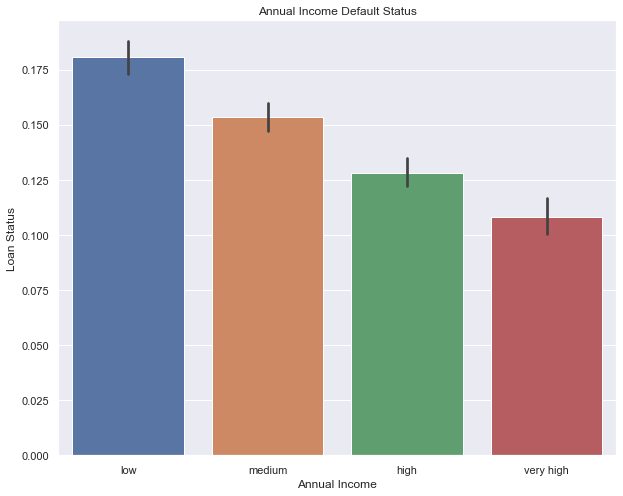

In [91]:
sns.barplot(x='annual_inc_cat', y='loan_status_category', data=Lccs1)
plt.title('Annual Income Default Status')
plt.xlabel('Annual Income')
plt.ylabel('Loan Status')
plt.show()

### Grade Vs Loan Status
Higher Grade Loans have high percentage to default.

In [92]:
pd.crosstab(Lccs1.grade, Lccs1.loan_status, margins=True, margins_name="Total", normalize="index")

loan_status,Charged Off,Fully Paid
grade,,
A,0.059972,0.940028
B,0.122066,0.877934
C,0.171925,0.828075
D,0.219906,0.780094
E,0.268494,0.731506
F,0.326844,0.673156
G,0.337793,0.662207
Total,0.145891,0.854109


This shows more clear that the as Grade increases the default rate also increases


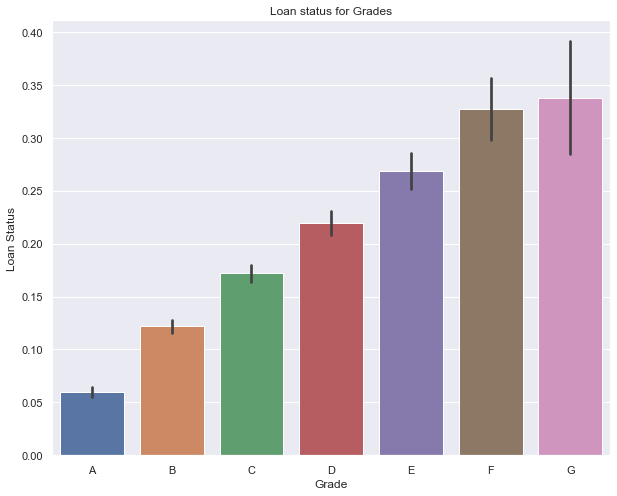

In [93]:
# bar plot on categorical variable : grade
level_order = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
sns.barplot(x='grade', y='loan_status_category', data=Lccs1,order=level_order)
plt.title('Loan status for Grades')
plt.xlabel('Grade')
plt.ylabel('Loan Status')
plt.show()

## Term Vs Loan status

In [94]:
pd.crosstab(Lccs1.term, Lccs1.loan_status, margins=True, margins_name="Total")

loan_status,Charged Off,Fully Paid,Total
term,,,
36,3227,25860,29087
60,2399,7077,9476
Total,5626,32937,38563


In [95]:
pd.crosstab(Lccs1.term, Lccs1.loan_status, margins=True, margins_name="Total", normalize="index")

loan_status,Charged Off,Fully Paid
term,,
36,0.110943,0.889057
60,0.253166,0.746834
Total,0.145891,0.854109


Almost 75% loans are issued for 36 month term period and most of fully paid, increase in term period increase the default rate

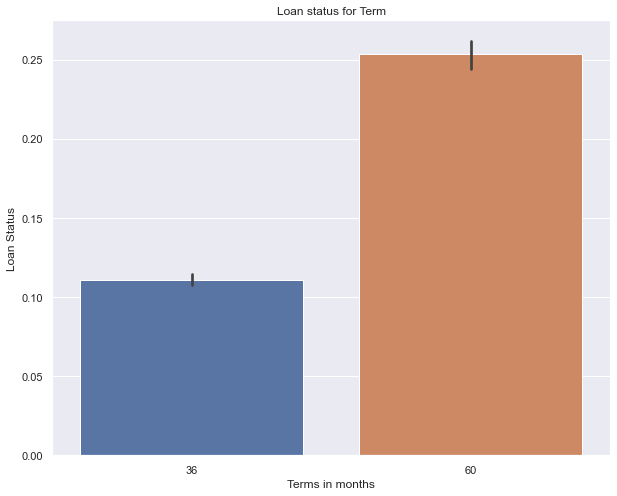

In [96]:
# bar plot on categorical variable : term_months
plt.title('Loan status for Term')
sns.barplot(x='term', y='loan_status_category', data=Lccs1)
plt.xlabel('Terms in months')
plt.ylabel('Loan Status')
plt.show()

## Loan Purpose Vs Status

In [97]:
pd.crosstab(Lccs1.purpose, Lccs1.loan_status, margins=True, margins_name="Total")

loan_status,Charged Off,Fully Paid,Total
purpose,,,
car,160,1339,1499
credit_card,542,4484,5026
debt_consolidation,2766,15282,18048
educational,56,269,325
home_improvement,347,2526,2873
house,59,308,367
major_purchase,222,1926,2148
medical,106,575,681
moving,92,484,576


In [98]:
pd.crosstab(Lccs1.purpose, Lccs1.loan_status, margins=True, margins_name="Total", normalize="index")

loan_status,Charged Off,Fully Paid
purpose,,
car,0.106738,0.893262
credit_card,0.107839,0.892161
debt_consolidation,0.153258,0.846742
educational,0.172308,0.827692
home_improvement,0.120780,0.879220
house,0.160763,0.839237
major_purchase,0.103352,0.896648
medical,0.155653,0.844347
moving,0.159722,0.840278


Since the most number of loan was issued for Debt consolidation, From the plot it is evident that ‘Small Business’ purpose loan is mostly likely to be defaulted followed by the renewable energy and other

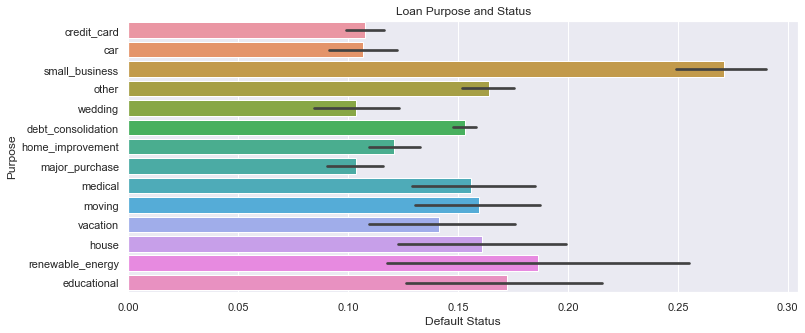

In [99]:

plt.figure(figsize = [12, 5])
sns.barplot(y='purpose', x='loan_status_category', data=Lccs1)
plt.title('Loan Purpose and Status')
plt.xlabel('Default Status')
plt.ylabel('Purpose')
plt.show()

## Loan Year Vs Status

In [100]:
# crosstab between loan status and issue year
pd.crosstab(Lccs1.loan_status, Lccs1.issue_d_year, margins=True, margins_name="Total")

issue_d_year,2007,2008,2009,2010,2011,Total
loan_status,,,,,,
Charged Off,45,247,594,1485,3255,5626
Fully Paid,206,1314,4119,10040,17258,32937
Total,251,1561,4713,11525,20513,38563


Here from the graph it shows the default rate is high in 2007 , but the default is high because the lending of 
Loan start from the year. No much inference

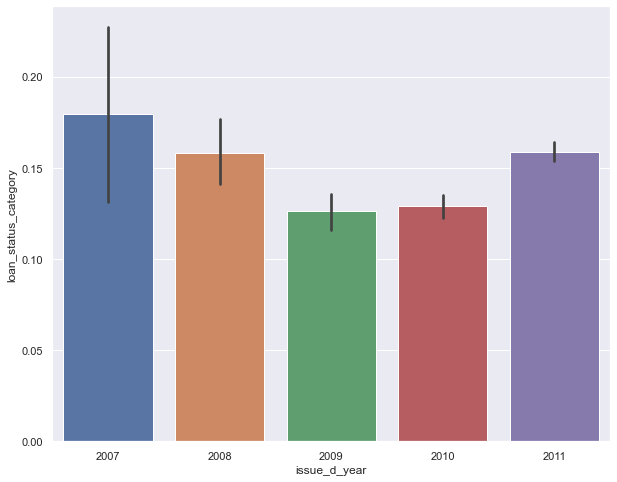

In [101]:
sns.barplot(x='issue_d_year', y='loan_status_category', data=Lccs1)
plt.show()

## Loan Month Vs Status

In [102]:
# crosstab between loan status and issue year
pd.crosstab(Lccs1.loan_status, Lccs1.issue_d_month, margins=True, margins_name="Total")

issue_d_month,1,2,3,4,5,6,7,8,9,10,11,12,Total
loan_status,,,,,,,,,,,,,
Charged Off,321,290,347,370,466,483,478,468,547,580,598,678,5626
Fully Paid,2057,2068,2343,2461,2452,2695,2871,2920,2949,3181,3404,3536,32937
Total,2378,2358,2690,2831,2918,3178,3349,3388,3496,3761,4002,4214,38563


From the graph, it is evident that most default rate at the Dec month followed by the May month. There is irregular pattern of default rates over the period of month , No inference found.

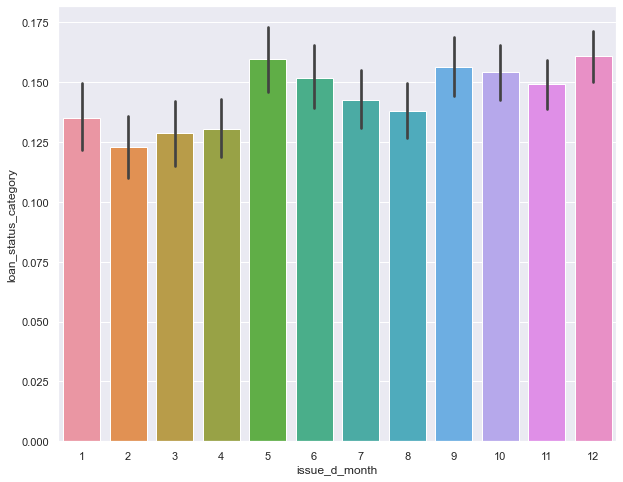

In [103]:
sns.barplot(x='issue_d_month', y='loan_status_category', data=Lccs1)
plt.show()

## Home Owners Vs Loan Status

In [104]:
pd.crosstab(Lccs1.loan_status, Lccs1.home_ownership, margins=True, margins_name="Total")

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT,Total
loan_status,,,,,,
Charged Off,2326,0,18,443,2839,5626
Fully Paid,14685,3,80,2531,15638,32937
Total,17011,3,98,2974,18477,38563


The Graph shows that high default rate in ‘Other’ Category,But only 100 persons are comes under this category. so there is no 
Inference from home ownership. Default rate is in almost straight line.No inference.


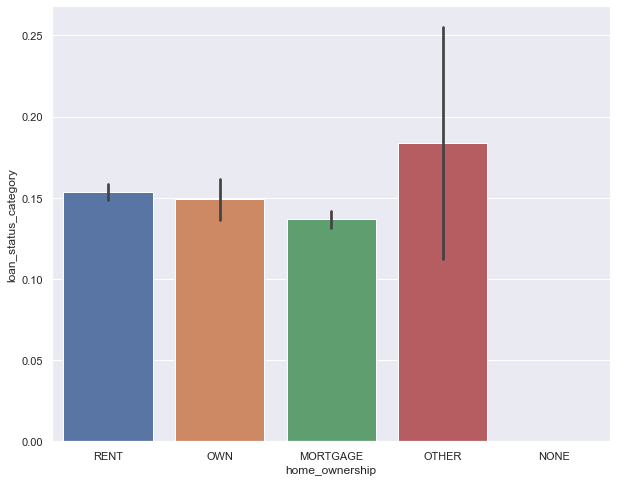

In [105]:
## bar plot on categorical variable : home_ownership
sns.barplot(x='home_ownership', y='loan_status_category', data=Lccs1)
plt.show()

## Employment Length Vs Loan Status

In [106]:
pd.crosstab(Lccs1.loan_status, Lccs1.emp_length, margins=True, margins_name="Total")

emp_length,0,1,2,3,4,5,6,7,8,9,10,Total
loan_status,,,,,,,,,,,,
Charged Off,639,456,566,555,462,458,307,263,203,158,1559,5626
Fully Paid,3868,2711,3724,3456,2880,2735,1861,1447,1231,1067,7957,32937
Total,4507,3167,4290,4011,3342,3193,2168,1710,1434,1225,9516,38563


This shows the normal trend , no inference found.
The most number of loans are issued to the experience over 10 years so it default rate is high but not very high compared to other length

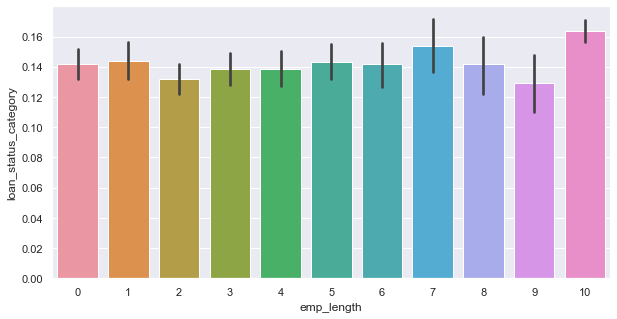

In [107]:
plt.figure(figsize=(10,5))
sns.barplot(x='emp_length', y='loan_status_category', data=Lccs1)
plt.show()

## Loan Amount Vs Loan Status

The loan amount is classified to low, medium, high, very high based on the 25%, median, 50% ,75% for easy analysis

In [108]:
Lccs1['loan_amnt'].describe().astype('int')

count    38563
mean     11047
std       7348
min        500
25%       5300
50%       9600
75%      15000
max      35000
Name: loan_amnt, dtype: int32

In [109]:
def loan_amnt(amt):
    if amt <= 5500:
        return 'low'
    elif amt > 5500 and amt <=10000:
        return 'medium'
    elif amt > 10000 and amt <=15000:
        return 'high'
    else:
        return 'very high'

Lccs1['loan_amnt_cat'] = Lccs1['loan_amnt'].apply(lambda x: loan_amnt(x))
Lccs1['loan_amnt_cat'].value_counts()

medium       12240
low          10025
very high     8617
high          7681
Name: loan_amnt_cat, dtype: int64

In [110]:
pd.crosstab( Lccs1.loan_amnt_cat, Lccs1.loan_status,margins=True, margins_name="Total", normalize="index")

loan_status,Charged Off,Fully Paid
loan_amnt_cat,,
high,0.137352,0.862648
low,0.137855,0.862145
medium,0.128595,0.871405
very high,0.187420,0.812580
Total,0.145891,0.854109


It is clear evident from the graph that very high loan amount causes more default

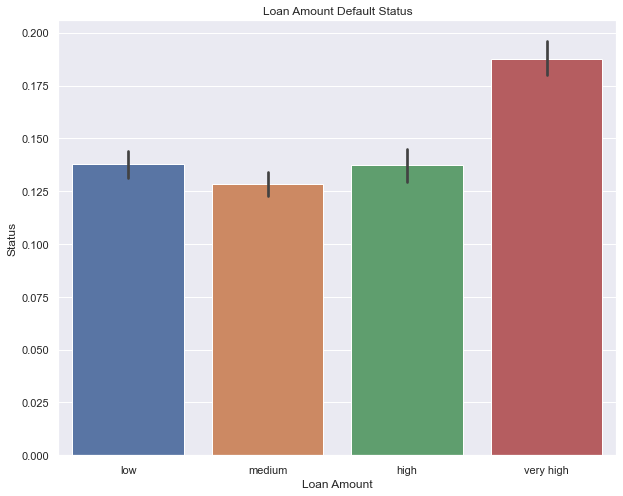

In [111]:
loan_order = ['low', 'medium', 'high', 'very high']
sns.barplot(x='loan_amnt_cat', y='loan_status_category', data=Lccs1, order = loan_order)
plt.title('Loan Amount Default Status')
plt.xlabel('Loan Amount')
plt.ylabel('Status')
plt.show()

## Debt To Income Ratio Vs Loan Status

The DTI is divided to 6 bins as the min value is 0 and max valye is less than 30

In [112]:
Lccs1['dti'].describe()

count    38563.000000
mean        13.276553
std          6.670335
min          0.000000
25%          8.140000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64

In [113]:
Lccs1['dti_bin'] = pd.cut(Lccs1['dti'],[0,5,10,15,20,25,30],labels=['0-5','5-10','10-15','15-20','20-25','25-30'])
Lccs1['dti_bin'].value_counts()

10-15    9630
15-20    8811
5-10     7872
20-25    6577
0-5      4873
25-30     623
Name: dti_bin, dtype: int64

The more loans are issued to the person with DTI between 10 – 20.
Only 623 applicants are comes under the 25-30 ratio, and also shows high default rate Compared to other DTI bins.
It is clearly evident that the Default rate increases with increases in DTI

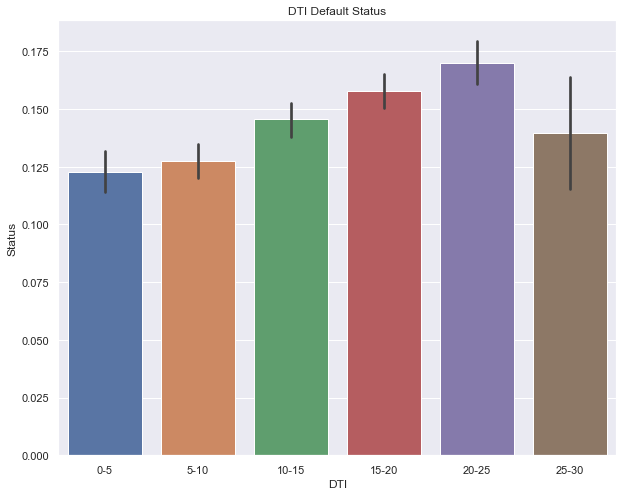

In [114]:
sns.barplot(x='dti_bin', y='loan_status_category', data=Lccs1)
plt.title('DTI Default Status')
plt.xlabel('DTI')
plt.ylabel('Status')
plt.show()

## verification_status Vs Loan Status

In [115]:
pd.crosstab( Lccs1.verification_status, Lccs1.loan_status,margins=True, margins_name="Total", normalize="index")

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,0.128363,0.871637
Source Verified,0.148263,0.851737
Verified,0.167978,0.832022
Total,0.145891,0.854109


In [116]:
pd.crosstab(Lccs1.loan_status, Lccs1.verification_status, margins=True, margins_name="Total")

verification_status,Not Verified,Source Verified,Verified,Total
loan_status,,,,
Charged Off,2142,1434,2050,5626
Fully Paid,14545,8238,10154,32937
Total,16687,9672,12204,38563


The Most loan was given to Non verified followed by other 2 status.
But from the graph it is shown an opposite trend like the most of the verified loans are defaulted 

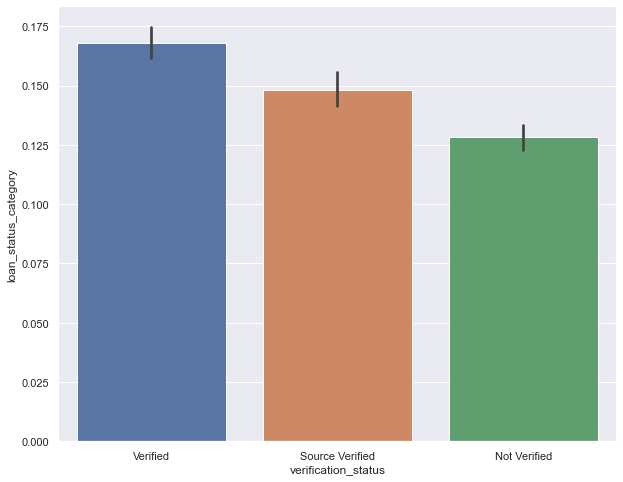

In [117]:
sns.barplot(x='verification_status', y='loan_status_category', data=Lccs1)
plt.show()

In [118]:
pd.crosstab( Lccs1.verification_status, Lccs1.loan_status,margins=True, margins_name="Total", normalize="index")

loan_status,Charged Off,Fully Paid
verification_status,,
Not Verified,0.128363,0.871637
Source Verified,0.148263,0.851737
Verified,0.167978,0.832022
Total,0.145891,0.854109


## Bivariate analysis

In [119]:
Lccs1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38563 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   loan_amnt             38563 non-null  int64         
 1   term                  38563 non-null  int64         
 2   int_rate              38563 non-null  float64       
 3   grade                 38563 non-null  object        
 4   sub_grade             38563 non-null  object        
 5   emp_length            38563 non-null  int64         
 6   home_ownership        38563 non-null  object        
 7   annual_inc            38563 non-null  int64         
 8   verification_status   38563 non-null  object        
 9   issue_d               38563 non-null  datetime64[ns]
 10  loan_status           38563 non-null  object        
 11  purpose               38563 non-null  object        
 12  addr_state            38563 non-null  object        
 13  dti             

Creating one more data Lccs2 set with only the default status for some of the analysis

In [120]:
Lccs2 = Lccs1[~Lccs1['loan_status'].isin(["Fully Paid"])]

## Verifciation status vs Loan amount

In [121]:
pd.crosstab(Lccs2.verification_status, Lccs2.loan_amnt_cat, margins=True, margins_name="Total")

loan_amnt_cat,high,low,medium,very high,Total
verification_status,,,,,
Not Verified,383,740,766,253,2142
Source Verified,316,410,416,292,1434
Verified,356,232,392,1070,2050
Total,1055,1382,1574,1615,5626


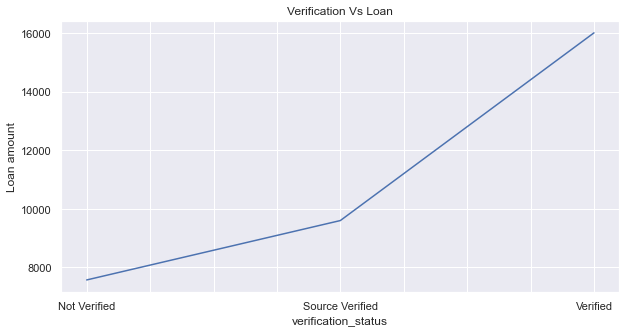

In [122]:
plt.figure(figsize=[10,5])
Lccs2.groupby(['verification_status'])['loan_amnt'].median().plot()
plt.title('Verification Vs Loan')
plt.ylabel('Loan amount')
plt.show()

### Interest Rate vs Loan amount

In [123]:
pd.crosstab(Lccs2.int_rate_bin, Lccs2.loan_amnt_cat, margins=True, margins_name="Total")

loan_amnt_cat,high,low,medium,very high,Total
int_rate_bin,,,,,
5-10,146,306,310,68,830
10-15,500,734,820,652,2706
15-20,355,325,419,695,1794
20-25,54,17,25,200,296
Total,1055,1382,1574,1615,5626


From the graph it is clearly identified there was low positive co-relation between interst rate and loan amount

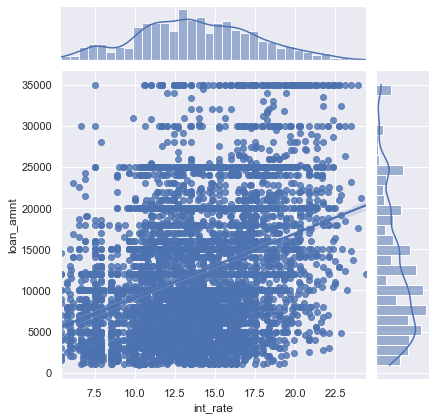

In [124]:
sns.jointplot(data=Lccs2, y="loan_amnt", x="int_rate",kind="reg")
plt.show()

## Loan Amount Vs Annual income

In [125]:
pd.crosstab(Lccs2.annual_inc_cat, Lccs2.loan_amnt_cat, margins=True)

loan_amnt_cat,high,low,medium,very high,All
annual_inc_cat,,,,,
high,319,211,349,676,1555
low,299,711,621,120,1751
medium,346,411,495,477,1729
very high,91,49,109,342,591
All,1055,1382,1574,1615,5626


From the scatter plot it is identified that there is low positive co-relation between the loan amount and Annual income. So may be the loan amount was given high for the low income applicant.


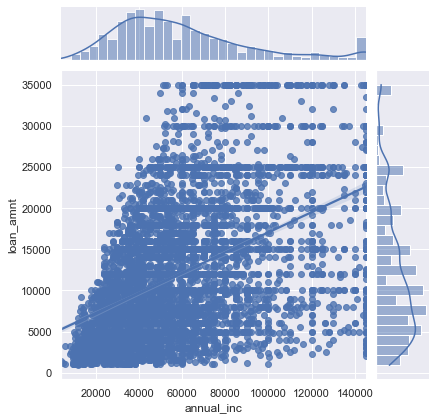

In [126]:
sns.jointplot(data=Lccs2, y="loan_amnt", x="annual_inc",kind="reg")
plt.show()

## Loan Purpose Vs Term for default rates


In the both the terms (36,60) the Loan purposes of the ‘Small Bussiness’ is defaulted highly.
But the educational loan is defaulted high in 60 months but in 36 months the default rate is low.


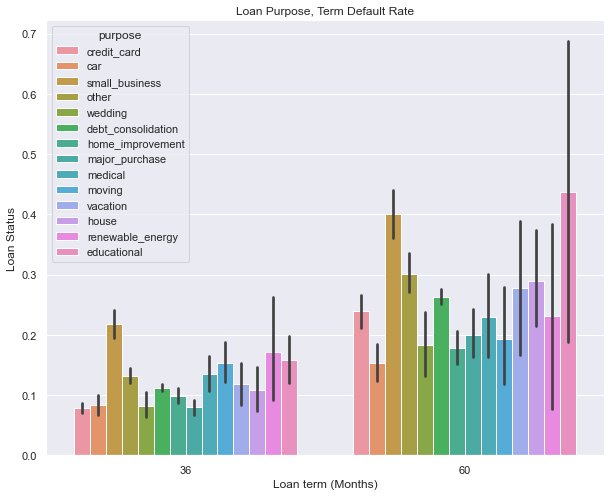

In [127]:
sns.barplot(x='term', y='loan_status_category', hue="purpose", data=Lccs1)
plt.title('Loan Purpose, Term Default Rate')
plt.xlabel('Loan term (Months)')
plt.ylabel('Loan Status')
plt.show();

## Loan Amount Vs Interest for default rates

From the graph it is identified clearly that the loan amount with high interest rate are likely to be defaulted more

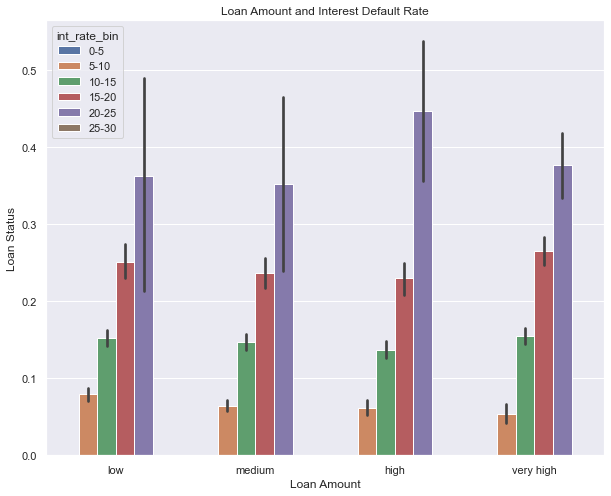

In [128]:
sns.barplot(x='loan_amnt_cat', y='loan_status_category', hue="int_rate_bin", data=Lccs1)
plt.title('Loan Amount and Interest Default Rate')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.show();

## Loan Amount Vs Annual Income for default rates

From the graph it is identified that higher Loan amount is more likely to be defaulted across the all the category of annual income (Low, medium,high, very high) and it follows the trend like the defaulters are more in the Low income category compared to overall.

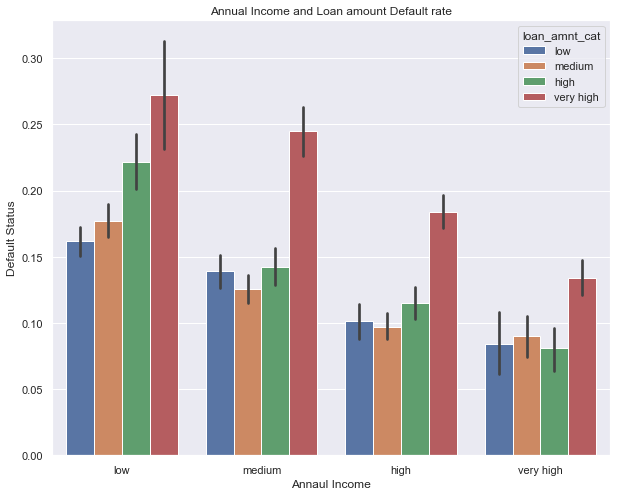

In [129]:
sns.barplot(x='annual_inc_cat', y='loan_status_category', hue="loan_amnt_cat", data=Lccs1)
plt.title('Annual Income and Loan amount Default rate')
plt.xlabel('Annaul Income')
plt.ylabel('Default Status')
plt.show();

### Home Ownership Vs purpose

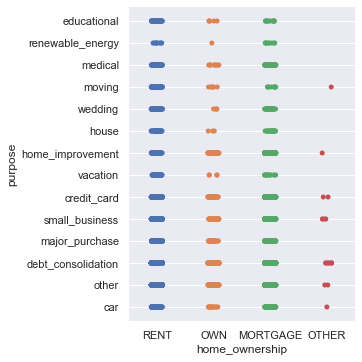

In [130]:
sns.catplot(x="home_ownership", y="purpose", data=Lccs2)

### Verification status vs Home_ownership

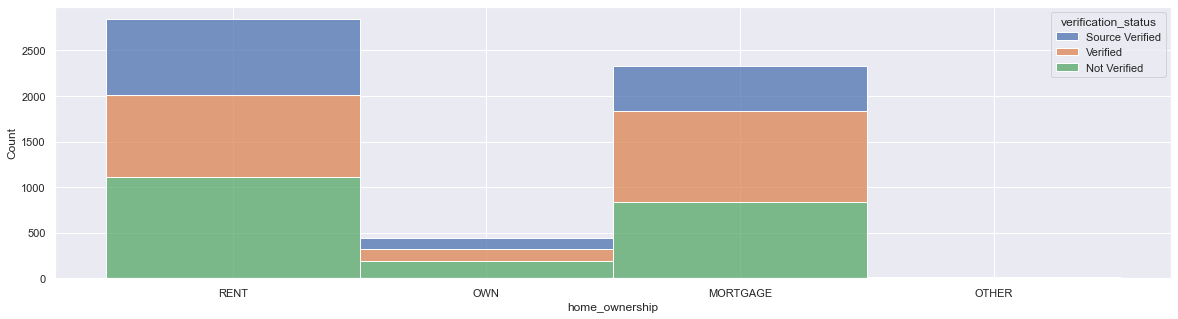

In [132]:
plt.figure(figsize=[20,5])
sns.histplot( x="home_ownership", hue="verification_status", data=Lccs2, stat="count", multiple="stack")
plt.show()